## Plan of the module 2:

1. Deutsch algorithm overview
1. Deutsch algorithm - implementation using quantum composer
1. Deutsch-Jozsa algorithm and it's implementation using quantum composer
1. Introduction to Qiskit with exercises
1. Homework

# Deutsch algorithm
* Theoretical explanation and proof.
* implementation in quantum composer.

# Deutsch-Jozsa algorithm

In a case of 2 input qubits, we have 16 possible binary functions.
Each of them gives 0 or 1 for one of 4 possible input sequences: 00, 01, 10, 11.

We'll use quantum composer to implement Deutsch-Jozsa algorithms for various Oracle functions.

Let's implement Deutch-Jozsa function which assignes 0,1,1,0 to each of the possible input sequences of two bits (respectively 00, 01, 10, 11). 

This is the function of adding modulo 2.

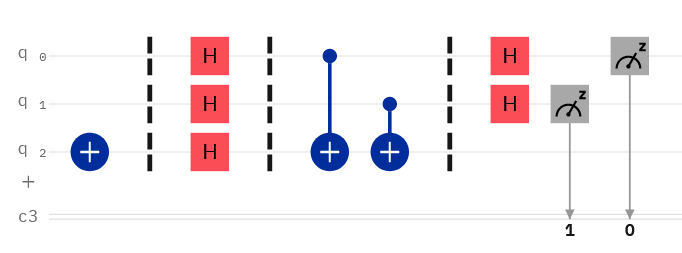

## Exercise 2.1: 
* Create the above circuit in quantum composer
* Verify based on the results of running this circuit, that the oracle function is balanced
* Prove, that the two CNOT gates indeed implement actually the 0110 function (adding modulo 2)

## Exercise 2.2: 
Create a Deutsch-Jozsa circuit where oracle function acting on two qubits has values 0,1,0,1 respectively for 00, 01, 10, 11 as input.

## Exercise 2.3:
Create Deutsch-Jozsa circuit implementing the two possible constant functions as an oracle.

# Introduction to Qiskit

#### Programming SDKs for quantum computers (QSDKs) that exist today:
1. IBM - <b>Qiskit</b> (Python, https://github.com/Qiskit/)
2. Google - <b>Cirq</b> (Python, https://github.com/quantumlib/Cirq)
3. Rigetti - <b>PyQuil</b> (Python, https://github.com/rigetti/pyquil)
4. Microsoft - <b>Microsoft Quantum Development Kit</b> (Q#, https://github.com/microsoft/Quantum)
5. ETH Zurich - <b>Project Q</b> (Python, https://github.com/ProjectQ-Framework/ProjectQ)

#### Quantum Open Source Foundation (QOSF): [https://qosf.org/](https://qosf.org/)

## References - or from where to learn:

* [https://github.com/qiskit](https://github.com/qiskit)

* [https://qiskit.org/](https://qiskit.org/)
    * In particular [https://qiskit.org/textbook](https://qiskit.org/textbook)
    * and https://qiskit.org/textbook-beta/
    * In general [https://qiskit.org/learn/](https://qiskit.org/learn/)

* [https://qiskit.org/documentation/](https://qiskit.org/documentation/)

* [Qiskit documentation tutorials](https://qiskit.org/documentation/tutorials/circuits/)

* finally, if you like to learn from YouTube ;) - https://www.youtube.com/c/qiskit


In [19]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright  

In [20]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.45.0', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.6.2', 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [21]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator

circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure(0, 0) 
circuit.measure(1, 1)

backend = QasmSimulator()

job = backend.run(circuit)

result = job.result()
counts = result.get_counts(circuit)

print(counts)

{'11': 513, '00': 511}


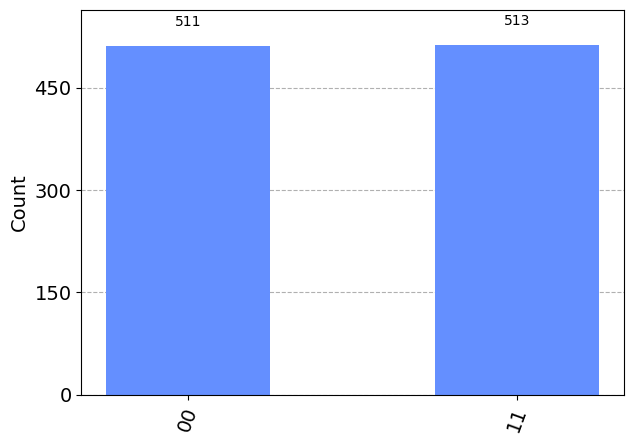

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Measurements

`circuit.measure([0,1], [0,1])`

Not all quibits need to be measured.

Number of bits in classical register does not need to be equal to number of qubits.

Running the circuit on chosen backend:

`job = backend.run(circuit, shots=3000)`

`job = execute(circuit, backend, shots=4321)`

Running jobs with remembering individual shots/runs:

`job = execute(circuit, backend, shots=20, memory=True)`

`data = job.result().get_memory()`

`print(data)`

In [23]:
%matplotlib inline
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

c:\Users\tomek\anaconda3\envs\ibm_venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


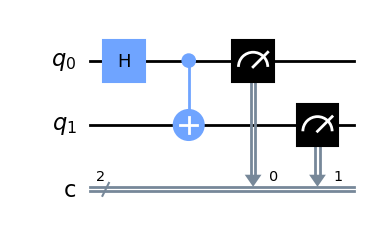

In [24]:
circuit.draw('mpl')

## Exercise 2.4 - coin flip simulation
Write program in Qiskit which will generate N random bit values (0 or 1) using Hadamard gate and quantum simulator.
Hadamard gate puts the qubit (initialized in |0>) in a superposition of |0> and |1> states. Subsequent measurement gives equal probability of getting 0 and 1. N is a parameter which can be set for any number.
We use simulator, which means the numbers are not really random (are pseudo-random), but in subsequent exercise we will use real quantum computer for generating really random numbers.

In [25]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def simulate_coin_flips(N):
    # Create a Quantum Circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply the Hadamard gate to the qubit
    circuit.h(0)

    # Measure the qubit into the classical bit
    circuit.measure(0, 0)

    # Select the QasmSimulator from the Aer provider
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator N times
    job = execute(circuit, simulator, shots=N)

    # Grab results from the job
    result = job.result()

    # Get counts and display them
    counts = result.get_counts(circuit)
    print(f"Counts: {counts}")

# Example: Simulate 1000 coin flips
simulate_coin_flips(1000)

Counts: {'1': 503, '0': 497}


## Providers and Backends

Provider
- entity that provides access to group of backends
- Qiskit includes 2 providers: `Aer` and `IBMQ`
- implements:
    - `backends()`
    - `get_backend(name)`

Backend
- represents either simulator or real quantum computer
- inherits from `BaseBackend`
- implements:
    - `run(qobj)`
    - `configuration()`
    - `properties()`
    - `name()`
    - `status()`

## Account and token

`IBMQ.save_account('<TOKEN>')`

If account is already saved, it can be overwritten with:

`IBMQ.save_account('<TOKEN>', overwrite=True)`

`IBMQ.stored_account()` - shows what account is stored on the machine

`IBMQ.delete_account()` - deletes currently stored account

More details: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq

In [26]:
from qiskit import IBMQ
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
IBMQ.save_account('348957014d94f1e55f48e53a39258698de4ae5e7b292951ec2c347030cea49cb61f5e9ccdeaf303f6c492152ac452086d893cf1582f0c3480ef90f634596a494', overwrite=True)

In [28]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-11-26 13:40:53,516: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [30]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
for backend in provider.backends():
    print(backend.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_lagos', 'backend_version': '1.6.2', 'operational': True, 'pending_jobs': 9, 'status_msg': 'dedicated'}
{'backend_name': 'ibm_nairobi', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 5, 'status_msg': 'active'}
{'backend_name': 'ibm_perth', 'backend_version': '1.2.8', 'operational': T

In [32]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

ibm_brisbane                 ibm_perth                    ibm_nairobi
------------                 ---------                    -----------
Num. Qubits:  127            Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 1029           Pending Jobs: 5              Pending Jobs: 5
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      226.8          Avg. T1:      164.9          Avg. T1:      99.1
Avg. T2:      150.9          Avg. T2:      162.0          Avg. T2:      65.9



ibm_lagos
---------
Num. Qubits:  7
Pending Jobs: 9
Least busy:   False
Operational:  True
Avg. T1:      106.4
Avg. T2:      62.6





In [33]:
real_backend = provider.get_backend('ibm_nairobi')

In [34]:
import pprint

pprint.pprint(real_backend.configuration().to_dict())

{'acquisition_latency': [],
 'allow_object_storage': True,
 'allow_q_object': True,
 'backend_name': 'ibm_nairobi',
 'backend_version': '1.3.3',
 'basis_gates': ['id', 'rz', 'sx', 'x', 'cx', 'reset'],
 'channels': {'acquire0': {'operates': {'qubits': [0]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire1': {'operates': {'qubits': [1]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire2': {'operates': {'qubits': [2]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire3': {'operates': {'qubits': [3]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire4': {'operates': {'qubits': [4]},
                           'purpose': 'acquire',
                           'type': 'acquire'},
              'acquire5': {'operates': 

In [35]:
from qiskit import execute
real_job = execute(circuit, real_backend, shots=1024)

## Jobs management

In [36]:
real_job_id=real_job.job_id()
real_job_id

'cnhkstqrw83g008a7jtg'

In [37]:
real_job.queue_position()

In [38]:
real_job.status()

<JobStatus.QUEUED: 'job is queued'>

`<JobStatus.QUEUED: 'job is queued'>`

`<JobStatus.RUNNING: 'job is actively running'>`

`<JobStatus.DONE: 'job has successfully run'>`

In [39]:
for job in real_backend.jobs():
    print(str(job.job_id()) + "   " + str(job.creation_date()) + "   " + str(job.status()))

In [40]:
real_result = real_backend.retrieve_job(real_job_id).result()

In [ ]:
real_counts = real_result.get_counts()

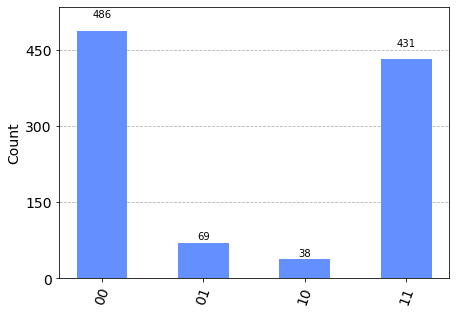

In [ ]:
plot_histogram(real_counts)

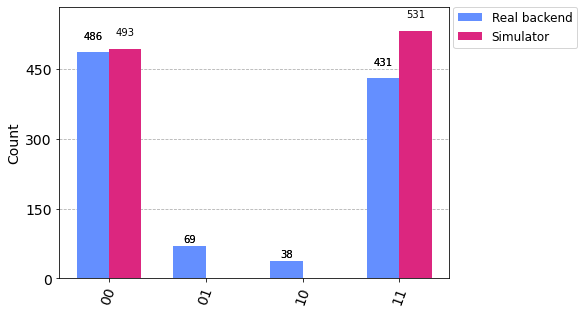

In [ ]:
plot_histogram([real_counts, counts], legend=["Real backend", "Simulator"])

You can execute an array of circuits with one job...to wait in the queue only once ;)

`circuit1 = QuantumCircuit(...)
...
circuit2 = QuantumCircuit(...)
...
job = execute([circuit1, circuit2], backend=real_backend)`

In [1]:
from qiskit import execute
real_job = execute(circuit, real_backend, shots=1024)

NameError: name 'circuit' is not defined

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(real_job, interval=5)

Job Status: job has successfully run


## Exercise 2.5 - random numbers generator
Generate 100 random numbers from 0 to 127 using quantum computer.

In [2]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram

def generate_random_numbers(num_samples=100):
    # Load IBM Q account if you're using a real device
    # IBMQ.load_account()

    # Create a Quantum Circuit with 7 qubits and 7 classical bits
    circuit = QuantumCircuit(7, 7)

    # Apply Hadamard gate to all qubits
    circuit.h(range(7))

    # Measure all qubits
    circuit.measure(range(7), range(7))

    # Select a backend (use a real quantum computer or simulator)
    # For real device: backend = IBMQ.get_provider('ibm-q').get_backend('ibmq_manila')
    backend = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the backend to get num_samples random numbers
    job = execute(circuit, backend, shots=num_samples)
    result = job.result()

    # Convert binary results to decimal
    counts = result.get_counts(circuit)
    random_numbers = [int(binary, 2) for binary, count in counts.items() for _ in range(count)]

    return random_numbers[:num_samples]

# Generate 100 random numbers
random_numbers = generate_random_numbers(10)
print("Random numbers:", random_numbers)

Random numbers: [65, 39, 78, 92, 42, 90, 68, 0, 4, 114]


# HOMEWORK

## Homework 1

Write qiskit circuit introducing the superposition of the binary representation of first letters of your name and surname.

Write Matplotlib plot visualizing the result.

Do the visualization when run on simulator.
Then run on real hardware limiting to 5 qubits and adding fixed constant qubits later on.

**Send this to me at Tomasz.Stopa@pl.ibm.com BEFORE the next meeting.**


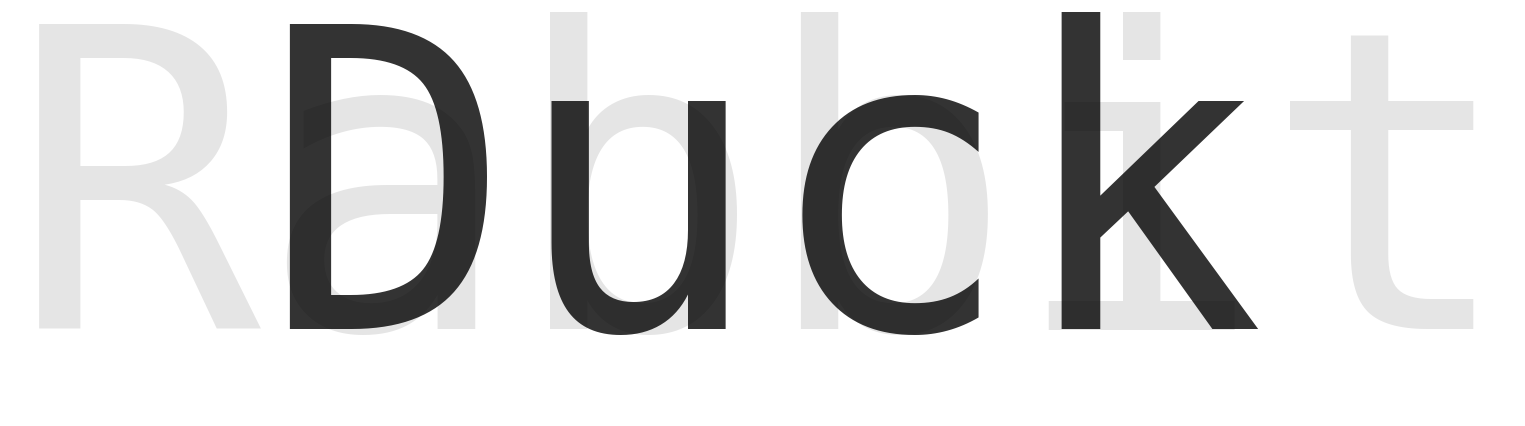

In [3]:
# Hint:

import matplotlib.pyplot as plt
plt.rc('font', family='monospace')
plt.annotate('Rabbit', (0.5,0.5), va="center", ha="center", color = (0,0,0,0.1), size = 300)
plt.annotate('Duck', (0.5,0.5), va="center", ha="center", color = (0,0,0,0.8), size = 300)
plt.axis('off')
plt.show()

T = 10100 Calculate_T = 10100 True
S = 10011 Calculate_S = 10011 True


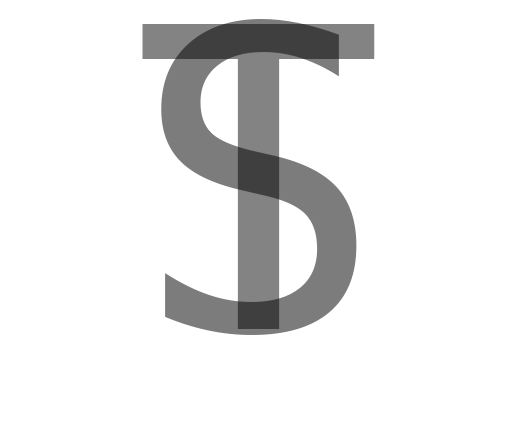

In [23]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt



from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
# @columns [0,1,2,3,4,5,6,7,8,9]



shots = 1024
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=shots)
result = job.result()
T=format(ord('T'), '08b')
S=format(ord('S'), '08b')
Calculate_T = list(result.get_counts().keys())[0]
Calculate_S = list(result.get_counts().keys())[1]
print(f"T = {T[-5:]} Calculate_T = {Calculate_T} {Calculate_T == T[-5:]}")
print(f"S = {S[-5:]} Calculate_S = {Calculate_S} {Calculate_S == S[-5:]}")
plot_histogram(result.get_counts())

new_result = {}
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    new_result[char_key] = value
plot_histogram(new_result)

plt.rc('font', family='monospace')
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    new_result[char_key] = value
    plt.annotate(char_key, (0.5,0.5), va="center", ha="center", color = (0,0,0,value/shots), size = 300)
plt.axis('off')
plt.show()

T = 01010100 Calculate_T = 10100 True
S = 01010011 Calculate_S = 10011 True


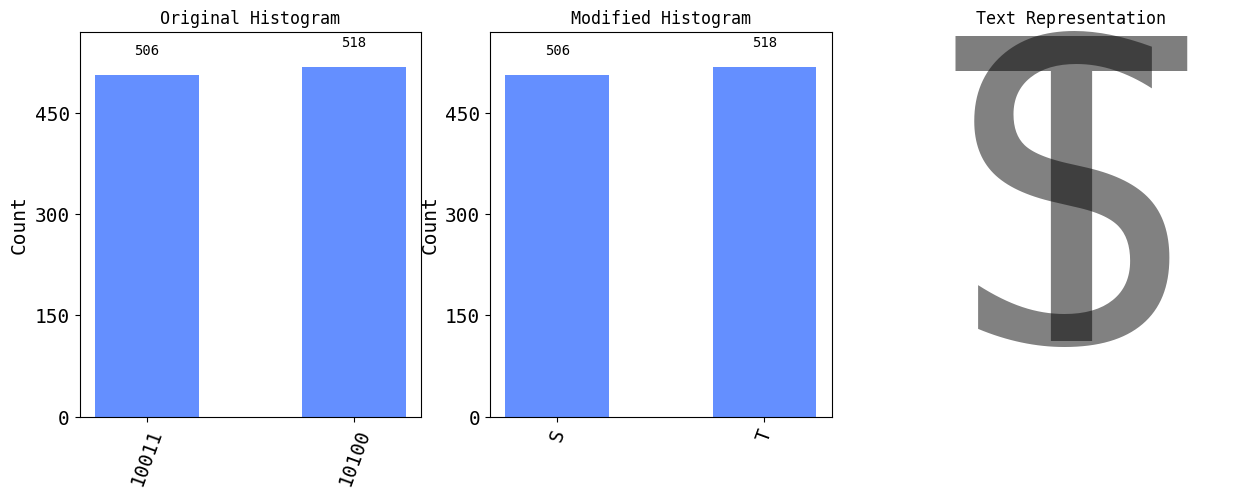

In [24]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt



from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
# @columns [0,1,2,3,4,5,6,7,8,9]



shots = 1024
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=shots)
result = job.result()
T=format(ord('T'), '08b')
S=format(ord('S'), '08b')
Calculate_T = list(result.get_counts().keys())[0]
Calculate_S = list(result.get_counts().keys())[1]
print(f"T = {T} Calculate_T = {Calculate_T} {Calculate_T == T[-5:]}")
print(f"S = {S} Calculate_S = {Calculate_S} {Calculate_S == S[-5:]}")

new_result = {}
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    new_result[char_key] = value

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Original Histogram")
plot_histogram(result.get_counts(), ax=axs[0])

axs[1].set_title("Modified Histogram")
plot_histogram(new_result, ax=axs[1])

axs[2].set_title("Text Representation")
axs[2].axis('off')
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    axs[2].annotate(char_key, (0.5, 0.5), va="center", ha="center", 
                    color=(0, 0, 0, value/shots), size=300)

plt.show()

In [26]:
from qiskit import IBMQ

# IBMQ.save_account('', overwrite=True)
provider = IBMQ.load_account()
real_backend = provider.get_backend('ibm_nairobi')

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt



from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
# @columns [0,1,2,3,4,5,6,7,8,9]



shots = 1024
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=real_backend, shots=shots)
result = job.result()
T=format(ord('T'), '08b')
S=format(ord('S'), '08b')
Calculate_T = list(result.get_counts().keys())[0]
Calculate_S = list(result.get_counts().keys())[1]
print(f"T = {T} Calculate_T = {Calculate_T} {Calculate_T == T[-5:]}")
print(f"S = {S} Calculate_S = {Calculate_S} {Calculate_S == S[-5:]}")

new_result = {}
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    new_result[char_key] = value

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title("Original Histogram")
plot_histogram(result.get_counts(), ax=axs[0])

axs[1].set_title("Modified Histogram")
plot_histogram(new_result, ax=axs[1])

axs[2].set_title("Text Representation")
axs[2].axis('off')
for binary_key, value in result.get_counts().items():
    ascii_code = int("010"+binary_key, 2)
    char_key = chr(ascii_code)
    axs[2].annotate(char_key, (0.5, 0.5), va="center", ha="center", 
                    color=(0, 0, 0, value/shots), size=300)

plt.show()

# Homework 2

Get familiar with announcements from Quantum Summit last week: https://newsroom.ibm.com/2022-11-09-IBM-Unveils-400-Qubit-Plus-Quantum-Processor-and-Next-Generation-IBM-Quantum-System-Two